In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")


In [2]:
data=pd.read_csv(r"C:\Users\srush\OneDrive\Pictures\code\CL-1-main\dataset\Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
target_data = data.iloc[:,4]
target_data.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [6]:
clustering_data = data.iloc[:,[0,1,2,3]]
clustering_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


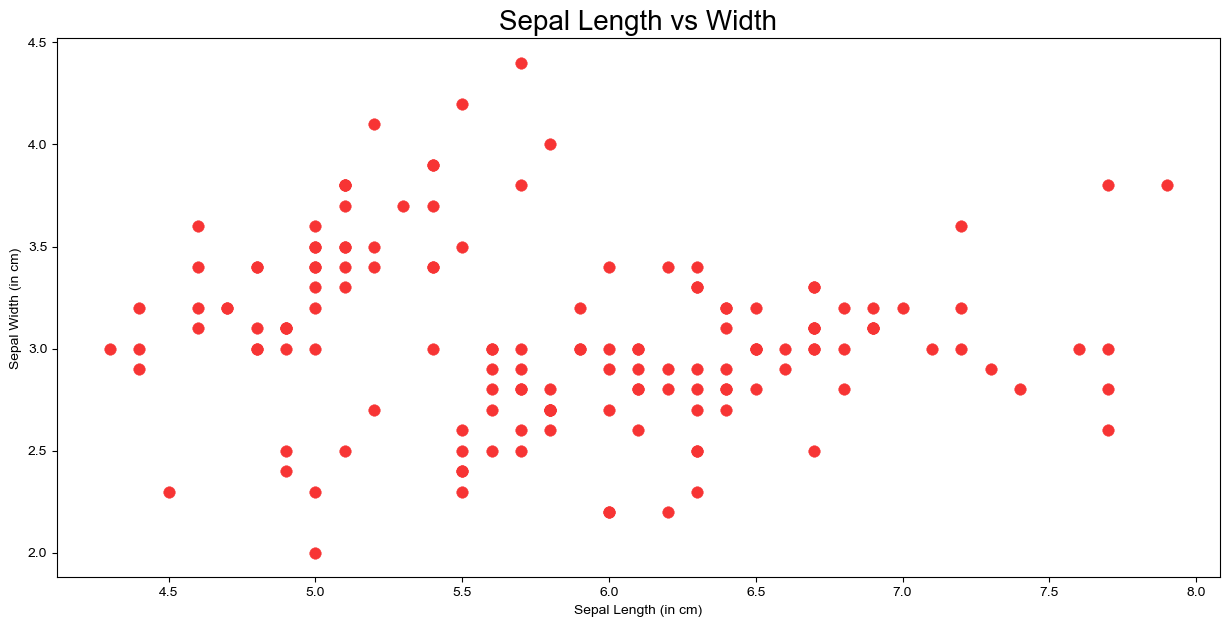

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=data['SepalLengthCm'],y=data['SepalWidthCm'], s=70, color='#f73434',
edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

In [8]:
wcss=[]
for i in range(1,11):
    km = KMeans(i)

km.fit(clustering_data)
wcss.append(km.inertia_)
np.array(wcss)

array([3083.28026505])

In [9]:
kms = KMeans(n_clusters=4, init='k-means++')
kms.fit(clustering_data)
KMeans(n_clusters=4)

KMeans(n_clusters=4)

In [10]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,Cluster_Prediction
0,1,5.1,3.5,1.4,1
1,2,4.9,3.0,1.4,1
2,3,4.7,3.2,1.3,1
3,4,4.6,3.1,1.5,1
4,5,5.0,3.6,1.4,1


In [11]:
kms.cluster_centers_

array([[ 97.        ,   6.03513514,   2.80810811,   4.72162162],
       [ 20.5       ,   5.0375    ,   3.44      ,   1.4625    ],
       [133.        ,   6.64285714,   3.00285714,   5.54      ],
       [ 59.5       ,   5.76842105,   2.93421053,   3.59736842]])

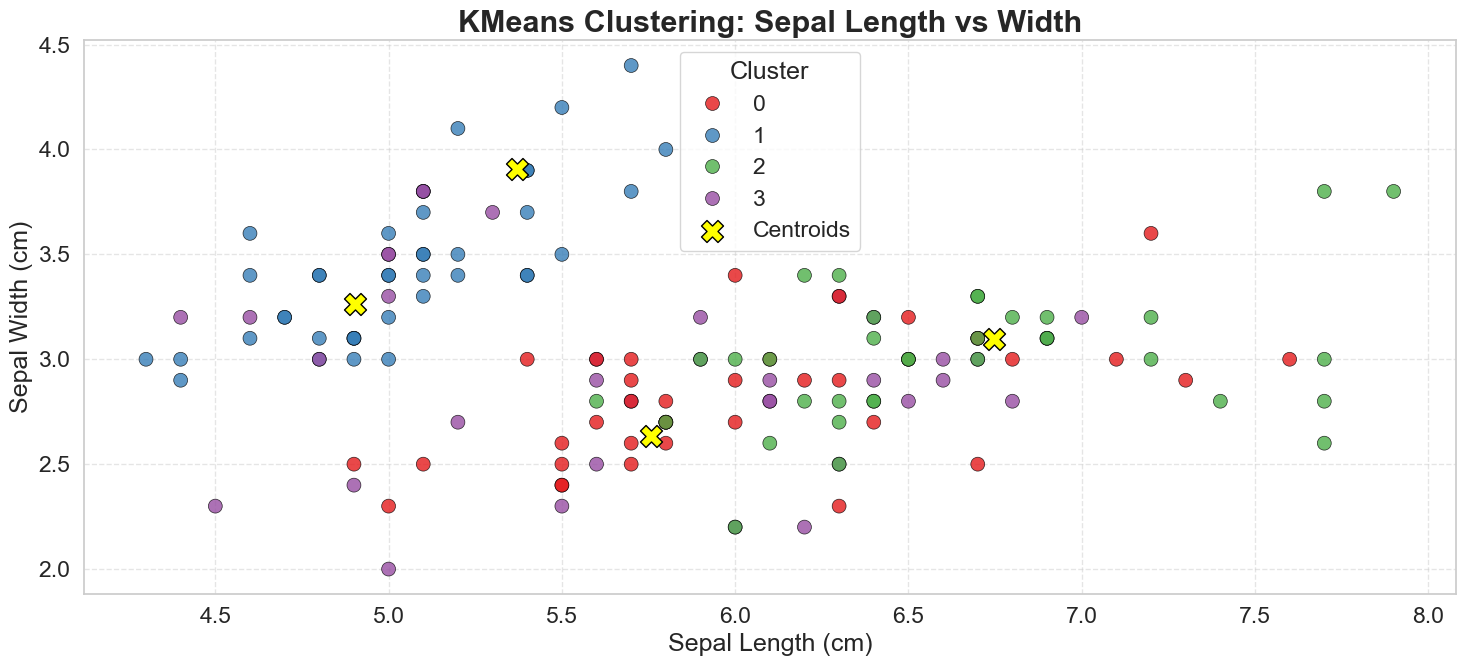

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and font
sns.set(style="whitegrid", font_scale=1.5)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 7))

# Plot each cluster
scatter = sns.scatterplot(
    data=clusters,
    x='SepalLengthCm',
    y='SepalWidthCm',
    hue='Cluster_Prediction',
    palette='Set1',
    s=100,                 # slightly bigger points
    edgecolor='black',      # make points stand out
    linewidth=0.5,
    alpha=0.8,
    ax=ax
)

# Plot centroids
from sklearn.preprocessing import StandardScaler

# Example if you scaled your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clusters[['SepalLengthCm','SepalWidthCm']])
kms.fit(scaled_data)

# Inverse-transform centroids to original scale
centroids_original = scaler.inverse_transform(kms.cluster_centers_)

# Then plot
ax.scatter(
    centroids_original[:, 0],
    centroids_original[:, 1],
    s=250, c='yellow', edgecolors='black', marker='X', label='Centroids'
)


# Labels and title
ax.set_title('KMeans Clustering: Sepal Length vs Width', fontsize=22, weight='bold')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Add legend
ax.legend(title='Cluster')

# Add gridlines (optional but cleaner)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
